# 基于大数据的房产估价

### 一、实验目的与要求

    1、掌握使用numpy和pandas库处理数据的基本方法。
    2、掌握使用Sklearn库对多元线性回归算法的实现及其评价方法。
    3、掌握使用matplotlib结合pandas库对数据分析可视化处理的基本方法。

### 二、实验内容

    1、利用python中pandas等库完成对数据的预处理。
    2、利用pandas、matplotlib等库完成对预处理数据的可视化。
    3、结合pandas、matplotlib库对聚类完成的结果进行可视化处理。

### 三、实验步骤

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import matplotlib.pyplot as mpl
# 设置绘图显示中文字体
mpl.rcParams["font.sans-serif"]="SimHei" #设置字体样式
mpl.rcParams["axes.unicode_minus"]=False #设置为字符显示


In [2]:
input_dir = '/data/bigfiles'
files = os.listdir(input_dir)
files

['双流.xlsx',
 '大邑.xlsx',
 '天府新区.xlsx',
 '天府新区南区.xlsx',
 '彭州.xlsx',
 '新津.xlsx',
 '新都.xlsx',
 '武侯.xlsx',
 '温江.xlsx',
 '简阳.xlsx',
 '蒲江.xlsx',
 '邛崃.xlsx',
 '郫都.xlsx',
 '都江堰.xlsx',
 '金堂.xlsx',
 '金牛.xlsx',
 '锦江.xlsx',
 '青白江.xlsx',
 '青羊.xlsx',
 '高新.xlsx',
 '高新西.xlsx',
 '龙泉驿.xlsx']

In [3]:
data = []
for i in files:
    data.append(pd.read_excel(input_dir +'/'+ i))
data = pd.concat(data)

data.head(1)

,描述,位置信息,区域,房屋信息,关注信息,总价,单价
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,3室2厅 | 86.4平米 | 东 | 简装 | 中楼层(共26层) | 2016年建 | 塔楼,135人关注 / 6个月以前发布,91.8万,单价10625元/平米


In [4]:
data = data.reset_index()
data = data.drop('index', axis = 1)
print(len(data))
data.head(10)

49043


,描述,位置信息,区域,房屋信息,关注信息,总价,单价
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,3室2厅 | 86.4平米 | 东 | 简装 | 中楼层(共26层) | 2016年建 | 塔楼,135人关注 / 6个月以前发布,91.8万,单价10625元/平米
1,房子清水套三户型方正采光好无遮挡，视野开阔！,南湖逸家二期,双流,3室1厅 | 66.12平米 | 东 | 毛坯 | 高楼层(共33层) | 2017年建 |...,40人关注 / 2个月以前发布,128.5万,单价19435元/平米
2,南湖逸家满二精装房，中间楼层，采光良好,南湖逸家二期,双流,3室1厅 | 73.59平米 | 南 | 精装 | 中楼层(共34层) | 2017年建 |...,58人关注 / 15天以前发布,153万,单价20791元/平米
3,佰客郡精装修房子配套成熟业主真心卖,佰客郡,双流,2室1厅 | 75.4平米 | 东 北 | 简装 | 中楼层(共16层) | 2011年建 ...,36人关注 / 2个月以前发布,89万,单价11804元/平米
4,加贝书香尚品 精装修 带家具家电出售,加贝书香尚品,双流,1室1厅 | 51.69平米 | 南 | 精装 | 高楼层(共15层) | 2007年建 | 板楼,38人关注 / 1个月以前发布,64.5万,单价12479元/平米
5,华府板块次新房 小区环境好 品质开发商,中铁骑士府邸,双流,3室2厅 | 90.51平米 | 西北 | 毛坯 | 低楼层(共32层) | 2017年建 ...,210人关注 / 4个月以前发布,158万,单价17457元/平米
6,怡心湖套三双卫，精装修满两年，对中庭，安静不临街,南湖逸家二期,双流,3室2厅 | 83.38平米 | 西 | 精装 | 中楼层(共32层) | 2017年建 |...,25人关注 / 19天以前发布,175万,单价20989元/平米
7,海棠金宇 2室1厅 72万,海棠金宇,双流,2室1厅 | 84平米 | 南 | 简装 | 中楼层(共6层) | 板楼,39人关注 / 10天以前发布,72万,单价8572元/平米
8,交大楠岸 临凤翔湖清水小套三 业主诚心出售,交大归谷楠岸,双流,3室2厅 | 73.92平米 | 西 | 毛坯 | 中楼层(共14层) | 2017年建 |...,30人关注 / 6天以前发布,105万,单价14205元/平米
9,月光湖小套三户型，中间楼层，视野开阔,通瑞月光湖,双流,3室1厅 | 88.92平米 | 东南 | 简装 | 中楼层(共26层) | 塔楼,27人关注 / 4天以前发布,115万,单价12933元/平米


In [5]:
 data.房屋信息.map(lambda x:x.split('|'))

0        [3室2厅 ,  86.4平米 ,  东 ,  简装 ,  中楼层(共26层) ,  201...
1        [3室1厅 ,  66.12平米 ,  东 ,  毛坯 ,  高楼层(共33层) ,  20...
2        [3室1厅 ,  73.59平米 ,  南 ,  精装 ,  中楼层(共34层) ,  20...
3        [2室1厅 ,  75.4平米 ,  东 北 ,  简装 ,  中楼层(共16层) ,  2...
4        [1室1厅 ,  51.69平米 ,  南 ,  精装 ,  高楼层(共15层) ,  20...
                               ...                        
49038    [3室2厅 ,  90.9平米 ,  东 ,  精装 ,  低楼层(共34层) ,  201...
49039     [4室2厅 ,  215.27平米 ,  南 ,  毛坯 ,  低楼层(共2层)  ,  板楼]
49040    [2室1厅 ,  56.71平米 ,  南 ,  其他 ,  高楼层(共5层)  ,  暂无数据]
49041    [3室2厅 ,  89.35平米 ,  东南 ,  毛坯 ,  低楼层(共34层) ,  2...
49042       [3室1厅 ,  97平米 ,  南 北 ,  简装 ,  中楼层(共6层)  ,  板楼]
Name: 房屋信息, Length: 49043, dtype: object

In [6]:
data.房屋信息.map(lambda x:len(x.split('|'))).value_counts()

7    36252
6    12257
8      362
4      122
5       50
Name: 房屋信息, dtype: int64

In [7]:
data = data[data.房屋信息.map(lambda x:len(x.split('|')) == 7)]
data

,描述,位置信息,区域,房屋信息,关注信息,总价,单价
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,3室2厅 | 86.4平米 | 东 | 简装 | 中楼层(共26层) | 2016年建 | 塔楼,135人关注 / 6个月以前发布,91.8万,单价10625元/平米
1,房子清水套三户型方正采光好无遮挡，视野开阔！,南湖逸家二期,双流,3室1厅 | 66.12平米 | 东 | 毛坯 | 高楼层(共33层) | 2017年建 |...,40人关注 / 2个月以前发布,128.5万,单价19435元/平米
2,南湖逸家满二精装房，中间楼层，采光良好,南湖逸家二期,双流,3室1厅 | 73.59平米 | 南 | 精装 | 中楼层(共34层) | 2017年建 |...,58人关注 / 15天以前发布,153万,单价20791元/平米
3,佰客郡精装修房子配套成熟业主真心卖,佰客郡,双流,2室1厅 | 75.4平米 | 东 北 | 简装 | 中楼层(共16层) | 2011年建 ...,36人关注 / 2个月以前发布,89万,单价11804元/平米
4,加贝书香尚品 精装修 带家具家电出售,加贝书香尚品,双流,1室1厅 | 51.69平米 | 南 | 精装 | 高楼层(共15层) | 2007年建 | 板楼,38人关注 / 1个月以前发布,64.5万,单价12479元/平米
...,...,...,...,...,...,...,...
49035,居家装修大套三，双卫，可拎包入住,春秋名邸,龙泉驿,3室2厅 | 116.72平米 | 东南 | 其他 | 中楼层(共22层) | 2012年建...,4人关注 / 2个月以前发布,130万,单价11138元/平米
49036,标准套二，中间楼层，户型方正。,春秋家院,龙泉驿,2室2厅 | 80平米 | 东南 | 简装 | 中楼层(共7层) | 2003年建 | 板楼,18人关注 / 2个月以前发布,83万,单价10375元/平米
49037,新上房源 精致装修 户型好 业主诚心卖,四季映像,龙泉驿,3室2厅 | 85.72平米 | 东南 | 精装 | 低楼层(共18层) | 2012年建 ...,8人关注 / 2个月以前发布,138万,单价16099元/平米
49038,装修套三，业主置换。看小区中庭,林溪康城,龙泉驿,3室2厅 | 90.9平米 | 东 | 精装 | 低楼层(共34层) | 2017年建 | ...,13人关注 / 2个月以前发布,98万,单价10782元/平米


In [8]:
data.shape

(36252, 7)

In [9]:
data.loc[:,'户型'] = data.房屋信息.map(lambda x : x.split('|')[0]) 
data.loc[:,'面积'] = data.房屋信息.map(lambda x : x.split('|')[1])
data.loc[:,'朝向'] = data.房屋信息.map(lambda x : x.split('|')[2])
data.loc[:,'类型'] = data.房屋信息.map(lambda x : x.split('|')[3])
data.loc[:,'楼层'] = data.房屋信息.map(lambda x : x.split('|')[4])
data.loc[:,'建成时间'] = data.房屋信息.map(lambda x : x.split('|')[5]) 
data.loc[:,'结构'] = data.房屋信息.map(lambda x : x.split('|')[6]) # 删除房屋信息列
data = data.drop('房屋信息', axis = 1) 

In [10]:
data.head(1)

,描述,位置信息,区域,关注信息,总价,单价,户型,面积,朝向,类型,楼层,建成时间,结构
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,135人关注 / 6个月以前发布,91.8万,单价10625元/平米,3室2厅,86.4平米,东,简装,中楼层(共26层),2016年建,塔楼


In [11]:
data.关注信息.map(lambda x : len(x.split('/'))).value_counts()

2    36252
Name: 关注信息, dtype: int64

In [12]:
data['关注人数'] = data.关注信息.map(lambda x : x.split('/')[0])
data['发布时间'] = data.关注信息.map(lambda x : x.split('/')[1])

In [13]:
data.楼层.map(lambda x : len(x.split('('))).value_counts()

2    35573
1      679
Name: 楼层, dtype: int64

In [14]:
data = data[data.楼层.map(lambda x : len(x.split('(')) == 2)]

In [15]:
data.head(1)

,描述,位置信息,区域,关注信息,总价,单价,户型,面积,朝向,类型,楼层,建成时间,结构,关注人数,发布时间
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,135人关注 / 6个月以前发布,91.8万,单价10625元/平米,3室2厅,86.4平米,东,简装,中楼层(共26层),2016年建,塔楼,135人关注,6个月以前发布


In [16]:
data['所在楼层'] = data.楼层.map(lambda x : x.split('(')[0])
data['总楼层'] = data.楼层.map(lambda x : x.split('(')[1])

In [17]:
data.head(1)

,描述,位置信息,区域,关注信息,总价,单价,户型,面积,朝向,类型,楼层,建成时间,结构,关注人数,发布时间,所在楼层,总楼层
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,135人关注 / 6个月以前发布,91.8万,单价10625元/平米,3室2厅,86.4平米,东,简装,中楼层(共26层),2016年建,塔楼,135人关注,6个月以前发布,中楼层,共26层)


In [18]:
data = data.drop(['关注信息','楼层'],axis = 1)

In [19]:
data.head(1)

,描述,位置信息,区域,总价,单价,户型,面积,朝向,类型,建成时间,结构,关注人数,发布时间,所在楼层,总楼层
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,91.8万,单价10625元/平米,3室2厅,86.4平米,东,简装,2016年建,塔楼,135人关注,6个月以前发布,中楼层,共26层)


In [20]:
data.shape

(35573, 15)

In [21]:
data = data.reset_index()
data = data.drop('index', axis = 1)
data.head()

,描述,位置信息,区域,总价,单价,户型,面积,朝向,类型,建成时间,结构,关注人数,发布时间,所在楼层,总楼层
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,91.8万,单价10625元/平米,3室2厅,86.4平米,东,简装,2016年建,塔楼,135人关注,6个月以前发布,中楼层,共26层)
1,房子清水套三户型方正采光好无遮挡，视野开阔！,南湖逸家二期,双流,128.5万,单价19435元/平米,3室1厅,66.12平米,东,毛坯,2017年建,板塔结合,40人关注,2个月以前发布,高楼层,共33层)
2,南湖逸家满二精装房，中间楼层，采光良好,南湖逸家二期,双流,153万,单价20791元/平米,3室1厅,73.59平米,南,精装,2017年建,板塔结合,58人关注,15天以前发布,中楼层,共34层)
3,佰客郡精装修房子配套成熟业主真心卖,佰客郡,双流,89万,单价11804元/平米,2室1厅,75.4平米,东 北,简装,2011年建,板楼,36人关注,2个月以前发布,中楼层,共16层)
4,加贝书香尚品 精装修 带家具家电出售,加贝书香尚品,双流,64.5万,单价12479元/平米,1室1厅,51.69平米,南,精装,2007年建,板楼,38人关注,1个月以前发布,高楼层,共15层)


In [22]:
data.describe()

,描述,位置信息,区域,总价,单价,户型,面积,朝向,类型,建成时间,结构,关注人数,发布时间,所在楼层,总楼层
count,35573,35573,35573,35573,35573,35573,35573,35573,35573,35573,35573,35573,35573,35573,35573
unique,35117,5711,21,1551,16736,35,10890,90,4,50,6,394,44,7,58
top,龙湖时代天街 层高4.9米 采光好 通风好,保利香槟国际,高新,120万,单价10000元/平米,3室2厅,89平米,东南,精装,2012年建,板塔结合,0人关注,一年前发布,高楼层,共6层)
freq,11,289,2855,648,77,11114,246,10075,15353,3671,15203,2502,8685,12896,5660


In [23]:
data.单价 = data.单价.map(lambda x: int(re.findall('\d+',x)[0])/10000.0).round(2)
def extract_number(series):
    return (
        series.astype(str)  # 确保所有值为字符串
        .str.extract('(\d+)', expand=False)  # 提取数字部分
        .astype(float)  # 转为浮点数
    )

# 应用处理
data.面积 = extract_number(data.面积)
data.建成时间 = extract_number(data.建成时间).astype('Int64')  # 转为可空整数
data.关注人数 = extract_number(data.关注人数).astype('Int64')
data.总楼层 = extract_number(data.总楼层).astype('Int64')
data = data.reindex()
data.head()

,描述,位置信息,区域,总价,单价,户型,面积,朝向,类型,建成时间,结构,关注人数,发布时间,所在楼层,总楼层
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,91.8万,1.06,3室2厅,86.0,东,简装,2016,塔楼,135,6个月以前发布,中楼层,26
1,房子清水套三户型方正采光好无遮挡，视野开阔！,南湖逸家二期,双流,128.5万,1.94,3室1厅,66.0,东,毛坯,2017,板塔结合,40,2个月以前发布,高楼层,33
2,南湖逸家满二精装房，中间楼层，采光良好,南湖逸家二期,双流,153万,2.08,3室1厅,73.0,南,精装,2017,板塔结合,58,15天以前发布,中楼层,34
3,佰客郡精装修房子配套成熟业主真心卖,佰客郡,双流,89万,1.18,2室1厅,75.0,东 北,简装,2011,板楼,36,2个月以前发布,中楼层,16
4,加贝书香尚品 精装修 带家具家电出售,加贝书香尚品,双流,64.5万,1.25,1室1厅,51.0,南,精装,2007,板楼,38,1个月以前发布,高楼层,15


In [24]:
data = data.join(pd.get_dummies(data.区域))
data.户型.unique()

array(['3室2厅 ', '3室1厅 ', '2室1厅 ', '1室1厅 ', '2室2厅 ', '4室2厅 ', '5室2厅 ',
       '4室1厅 ', '1室2厅 ', '3室3厅 ', '1室0厅 ', '5室1厅 ', '6室2厅 ', '4室3厅 ',
       '6室1厅 ', '3室0厅 ', '6室4厅 ', '5室3厅 ', '4室4厅 ', '6室3厅 ', '7室2厅 ',
       '7室3厅 ', '4室0厅 ', '5室0厅 ', '8室2厅 ', '3室4厅 ', '2室0厅 ', '7室1厅 ',
       '7室4厅 ', '9室2厅 ', '8室3厅 ', '5室4厅 ', '0室1厅 ', '7室5厅 ', '0室0厅 '],
      dtype=object)

In [25]:
data = data.join(pd.get_dummies(data.户型))
data.结构.unique()

array([' 塔楼', ' 板塔结合', ' 板楼', ' 叠拼别墅 ', ' 暂无数据', ' 平房'], dtype=object)

In [26]:
data = data.drop(data[data.结构 == ' 暂无数据'].index)
data.结构 = data.结构.map(lambda x: x.strip())
data.结构.unique()

array(['塔楼', '板塔结合', '板楼', '叠拼别墅', '平房'], dtype=object)

In [27]:
data = data.join(pd.get_dummies(data.结构))
data.head()

,描述,位置信息,区域,总价,单价,户型,面积,朝向,类型,建成时间,...,7室4厅,7室5厅,8室2厅,8室3厅,9室2厅,叠拼别墅,塔楼,平房,板塔结合,板楼
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,91.8万,1.06,3室2厅,86.0,东,简装,2016,...,0,0,0,0,0,0,1,0,0,0
1,房子清水套三户型方正采光好无遮挡，视野开阔！,南湖逸家二期,双流,128.5万,1.94,3室1厅,66.0,东,毛坯,2017,...,0,0,0,0,0,0,0,0,1,0
2,南湖逸家满二精装房，中间楼层，采光良好,南湖逸家二期,双流,153万,2.08,3室1厅,73.0,南,精装,2017,...,0,0,0,0,0,0,0,0,1,0
3,佰客郡精装修房子配套成熟业主真心卖,佰客郡,双流,89万,1.18,2室1厅,75.0,东 北,简装,2011,...,0,0,0,0,0,0,0,0,0,1
4,加贝书香尚品 精装修 带家具家电出售,加贝书香尚品,双流,64.5万,1.25,1室1厅,51.0,南,精装,2007,...,0,0,0,0,0,0,0,0,0,1


In [28]:
data.所在楼层.unique()

array([' 中楼层', ' 高楼层', ' 低楼层', ' 下叠', ' 地下室', ' 上叠', ' 未知'], dtype=object)

In [29]:
data = data.drop(data[data.所在楼层 == ' 未知'].index)
data.所在楼层 = data.所在楼层.map(lambda x: x.strip())
data = data.join(pd.get_dummies(data.所在楼层))

In [30]:
data.类型.unique()

array([' 简装 ', ' 毛坯 ', ' 精装 ', ' 其他 '], dtype=object)

In [31]:
data.类型 = data.类型.map(lambda x: x.strip())
data = data.join(pd.get_dummies(data.类型))
data.shape

(34911, 86)

In [32]:
data.columns

Index(['描述', '位置信息', '区域', '总价', '单价', '户型', '面积', '朝向', '类型', '建成时间', '结构',
       '关注人数', '发布时间', '所在楼层', '总楼层', '双流', '大邑', '天府新区', '天府新区南区', '彭州', '新津',
       '新都', '武侯', '温江', '简阳', '蒲江', '郫都', '都江堰', '金堂', '金牛', '锦江', '青白江',
       '青羊', '高新', '高新西', '龙泉驿', '0室0厅 ', '0室1厅 ', '1室0厅 ', '1室1厅 ', '1室2厅 ',
       '2室0厅 ', '2室1厅 ', '2室2厅 ', '3室0厅 ', '3室1厅 ', '3室2厅 ', '3室3厅 ', '3室4厅 ',
       '4室0厅 ', '4室1厅 ', '4室2厅 ', '4室3厅 ', '4室4厅 ', '5室0厅 ', '5室1厅 ', '5室2厅 ',
       '5室3厅 ', '5室4厅 ', '6室1厅 ', '6室2厅 ', '6室3厅 ', '6室4厅 ', '7室1厅 ', '7室2厅 ',
       '7室3厅 ', '7室4厅 ', '7室5厅 ', '8室2厅 ', '8室3厅 ', '9室2厅 ', '叠拼别墅', '塔楼',
       '平房', '板塔结合', '板楼', '上叠', '下叠', '中楼层', '低楼层', '地下室', '高楼层', '其他', '毛坯',
       '简装', '精装'],
      dtype='object')

In [33]:
data = data.drop(['户型','类型','结构','发布时间','所在楼层'], axis = 1)

In [34]:
data.head()

,描述,位置信息,区域,总价,单价,面积,朝向,建成时间,关注人数,总楼层,...,上叠,下叠,中楼层,低楼层,地下室,高楼层,其他,毛坯,简装,精装
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,91.8万,1.06,86.0,东,2016,135,26,...,0,0,1,0,0,0,0,0,1,0
1,房子清水套三户型方正采光好无遮挡，视野开阔！,南湖逸家二期,双流,128.5万,1.94,66.0,东,2017,40,33,...,0,0,0,0,0,1,0,1,0,0
2,南湖逸家满二精装房，中间楼层，采光良好,南湖逸家二期,双流,153万,2.08,73.0,南,2017,58,34,...,0,0,1,0,0,0,0,0,0,1
3,佰客郡精装修房子配套成熟业主真心卖,佰客郡,双流,89万,1.18,75.0,东 北,2011,36,16,...,0,0,1,0,0,0,0,0,1,0
4,加贝书香尚品 精装修 带家具家电出售,加贝书香尚品,双流,64.5万,1.25,51.0,南,2007,38,15,...,0,0,0,0,0,1,0,0,0,1


In [35]:
data.shape

(34911, 81)

In [36]:
data = data.reset_index()
data = data.drop('index',axis = 1)

In [37]:
data.index

RangeIndex(start=0, stop=34911, step=1)

In [38]:
data.朝向.map(lambda x: len(x.split())).value_counts()

1    31485
2     3368
3       48
4       10
Name: 朝向, dtype: int64

In [39]:
array1 = np.zeros((data.shape[0],8))
array1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
df1 = pd.DataFrame(array1,columns = ['东','南','西','北','东北','东南','西南','西北'])
df1

,东,南,西,北,东北,东南,西南,西北
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
34906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
for i in range(len(data.朝向)):
    for j in data.朝向[i].strip().split():
        df1.loc[i,j] = 1

In [42]:
df1.sum(axis = 1).value_counts()

1.0    31485
2.0     3368
3.0       48
4.0       10
dtype: int64

In [43]:
data = data.join(df1)
data = data.drop('朝向', axis = 1)
data.shape

(34911, 88)

In [44]:
data.head()

,描述,位置信息,区域,总价,单价,面积,建成时间,关注人数,总楼层,双流,...,简装,精装,东,南,西,北,东北,东南,西南,西北
0,威兰德装修套三对中庭，客户只给契税,威兰德小镇,双流,91.8万,1.06,86.0,2016,135,26,1,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,房子清水套三户型方正采光好无遮挡，视野开阔！,南湖逸家二期,双流,128.5万,1.94,66.0,2017,40,33,1,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,南湖逸家满二精装房，中间楼层，采光良好,南湖逸家二期,双流,153万,2.08,73.0,2017,58,34,1,...,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,佰客郡精装修房子配套成熟业主真心卖,佰客郡,双流,89万,1.18,75.0,2011,36,16,1,...,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,加贝书香尚品 精装修 带家具家电出售,加贝书香尚品,双流,64.5万,1.25,51.0,2007,38,15,1,...,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
data.describe()

,单价,面积,建成时间,关注人数,总楼层,双流,大邑,天府新区,天府新区南区,彭州,...,简装,精装,东,南,西,北,东北,东南,西南,西北
count,34911.000000,34911.000000,34844.000000,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000,...,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000,34911.000000
mean,1.516654,100.657185,2009.447681,31.211939,18.833405,0.067973,0.000544,0.072384,0.002950,0.011744,...,0.290625,0.434448,0.125491,0.302197,0.057460,0.101401,0.047693,0.305663,0.104580,0.055599
std,0.629793,39.891646,5.652235,46.235127,10.710804,0.251703,0.023323,0.259126,0.054238,0.107734,...,0.454057,0.495691,0.331279,0.459217,0.232724,0.301863,0.213118,0.460694,0.306016,0.229148
min,0.170000,12.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.090000,77.000000,2006.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.400000,91.000000,2010.000000,15.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.830000,122.000000,2014.000000,39.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,13.480000,557.000000,2020.000000,920.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


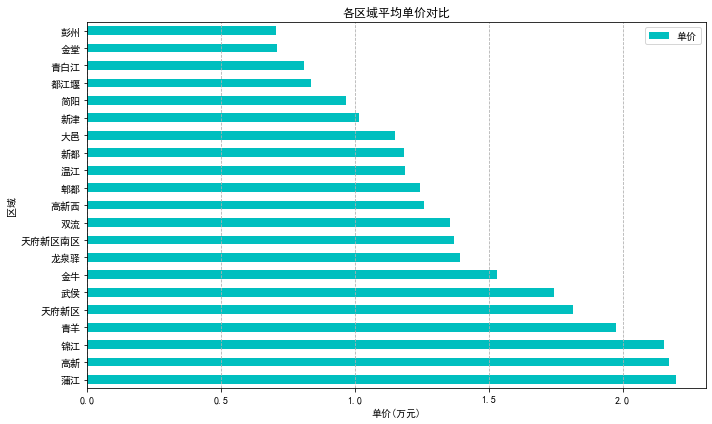

In [47]:
#各区域平均房价
(data.pivot_table(values='单价', 
                 index='区域', 
                 aggfunc='mean')
 .sort_values(by='单价', ascending=False)
 .plot(kind='barh', 
       color="c",
       figsize=(10, 6),
       title='各区域平均单价对比'))

# 添加标签和网格线
plt.xlabel('单价(万元)')  # 注意这里没有缩进
plt.ylabel('区域')
plt.grid(axis='x', linestyle='--')

# 显示图表
plt.tight_layout()
plt.show()

In [ ]:
#单价top10
ntop = 10
data_top = data.sort_values(by='单价', ascending=False)[:ntop]
y = range(len(data_top.单价))
width = data_top.单价
y_label = data_top.位置信息 + '(' + data_top.区域 + ')'

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)

ax.set(title='单价top10') 

ax.barh(y, width, 
        facecolor='bisque',
        edgecolor='pink',
        height=0.5,
        tick_label=y_label) 

plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '东'),
  Text(1, 0, '南'),
  Text(2, 0, '西'),
  Text(3, 0, '北'),
  Text(4, 0, '东南'),
  Text(5, 0, '西南'),
  Text(6, 0, '东北'),
  Text(7, 0, '西北')])

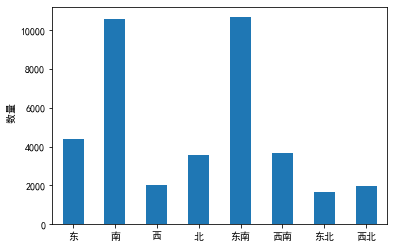

In [48]:
#房屋朝向分布
data[['东','南','西','北','东南','西南','东北','西北']].sum().plot(kind='bar')
plt.ylabel(' 数量')
plt.xticks(rotation=0) 

In [ ]:
#绘制某一区域的价格所在
bins = [0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.5]
plt.xlabel("价格区间")
pd.cut(data[data['区域' ]=='双流'].单价, bins).value_counts().plot(kind='bar')

<AxesSubplot:xlabel='单价', ylabel='关注人数'>

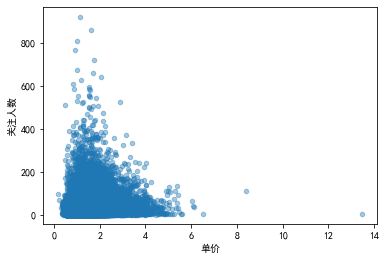

In [49]:
#单价与关注人数散点图
data.plot(kind="scatter",x="单价",y="关注人数",alpha=0.4)

<AxesSubplot:xlabel='单价', ylabel='面积'>

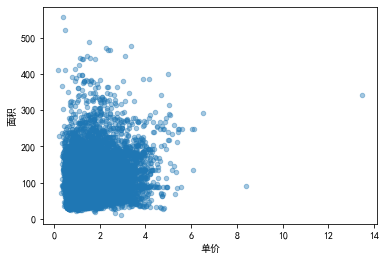

In [50]:
#单价与面积散点图
data.plot(kind="scatter",x="单价",y="面积",alpha=0.4)

In [52]:
#建立回归模型
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

In [53]:
data.columns

Index(['描述', '位置信息', '区域', '总价', '单价', '面积', '建成时间', '关注人数', '总楼层', '双流', '大邑',
       '天府新区', '天府新区南区', '彭州', '新津', '新都', '武侯', '温江', '简阳', '蒲江', '郫都', '都江堰',
       '金堂', '金牛', '锦江', '青白江', '青羊', '高新', '高新西', '龙泉驿', '0室0厅 ', '0室1厅 ',
       '1室0厅 ', '1室1厅 ', '1室2厅 ', '2室0厅 ', '2室1厅 ', '2室2厅 ', '3室0厅 ', '3室1厅 ',
       '3室2厅 ', '3室3厅 ', '3室4厅 ', '4室0厅 ', '4室1厅 ', '4室2厅 ', '4室3厅 ', '4室4厅 ',
       '5室0厅 ', '5室1厅 ', '5室2厅 ', '5室3厅 ', '5室4厅 ', '6室1厅 ', '6室2厅 ', '6室3厅 ',
       '6室4厅 ', '7室1厅 ', '7室2厅 ', '7室3厅 ', '7室4厅 ', '7室5厅 ', '8室2厅 ', '8室3厅 ',
       '9室2厅 ', '叠拼别墅', '塔楼', '平房', '板塔结合', '板楼', '上叠', '下叠', '中楼层', '低楼层',
       '地下室', '高楼层', '其他', '毛坯', '简装', '精装', '东', '南', '西', '北', '东北', '东南',
       '西南', '西北'],
      dtype='object')

In [54]:
total_price = data.总价
unit_price = data.单价
house_area = data.面积
house_type = data[[ '0室0厅 ', '0室1厅 ',
       '1室0厅 ', '1室1厅 ', '1室2厅 ', '2室0厅 ', '2室1厅 ', '2室2厅 ', '3室0厅 ', '3室1厅 ',
       '3室2厅 ', '3室3厅 ', '3室4厅 ', '4室0厅 ', '4室1厅 ', '4室2厅 ', '4室3厅 ', '4室4厅 ',
       '5室0厅 ', '5室1厅 ', '5室2厅 ', '5室3厅 ', '5室4厅 ', '6室1厅 ', '6室2厅 ', '6室3厅 ',
       '6室4厅 ', '7室1厅 ', '7室2厅 ', '7室3厅 ', '7室4厅 ', '7室5厅 ', '8室2厅 ', '8室3厅 ',
       '9室2厅 ']]
house_class = data[['毛坯', '简装', '精装']]
house_dirt = data[['东', '南', '西', '北', '东北',
       '东南', '西南', '西北']]
house_layer = data[[ '中楼层', '低楼层',
       '地下室',  '高楼层']]
total_layer = data.总楼层
X = pd.concat([house_area, house_type, house_class, house_dirt, house_layer, total_layer], axis=1)
Y = unit_price

In [55]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2, random_state = 10)

In [56]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
print(list(zip(X.columns, reg.coef_)))

[('面积', 0.0024484822764582114), ('0室0厅 ', -0.9564834108361753), ('0室1厅 ', 3.7582784107037526e-15), ('1室0厅 ', -0.3259707824044945), ('1室1厅 ', -0.12271107917930363), ('1室2厅 ', -0.14853636990984592), ('2室0厅 ', -0.42224998209530845), ('2室1厅 ', -0.12345642606733101), ('2室2厅 ', -0.2488173262854042), ('3室0厅 ', 0.7054143144489559), ('3室1厅 ', -0.16068891524404383), ('3室2厅 ', -0.2616974375580469), ('3室3厅 ', -0.3843100907222682), ('3室4厅 ', -4.2327252813834093e-16), ('4室0厅 ', -0.28603945844671913), ('4室1厅 ', -0.08925127560785312), ('4室2厅 ', -0.14019809382134427), ('4室3厅 ', -0.2743199996755602), ('4室4厅 ', 0.6975637457115709), ('5室0厅 ', -0.8795544943583122), ('5室1厅 ', 0.010911979764794237), ('5室2厅 ', 0.014179828466855345), ('5室3厅 ', -0.05362315846740704), ('5室4厅 ', -1.3680991157966378), ('6室1厅 ', 0.019630974914192578), ('6室2厅 ', -0.27687249067956504), ('6室3厅 ', -0.13430141537223517), ('6室4厅 ', -0.30317008354860275), ('7室1厅 ', 0.2695838082371533), ('7室2厅 ', -0.12385644989864025), ('7室3厅 ', 1.43469443

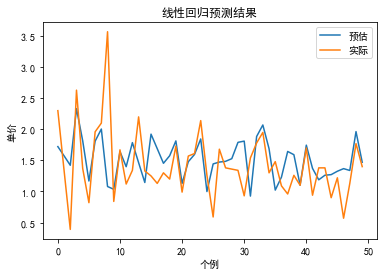

In [57]:
n = 50
plt.plot(range(len(yhat[:n])),yhat[:n])
plt.plot(range(len(Ytest[:n])),Ytest[:n])
plt.xlabel('个例')
plt.ylabel('单价')
plt.title('线性回归预测结果')
plt.legend(["预估","实际"])

In [58]:
# 用于检验模型效果
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error  # MAE
from sklearn.metrics import r2_score  # R2

mse = mean_squared_error(Ytest, yhat)  # MSE
mae = mean_absolute_error(Ytest, yhat)  # MAE
r2 = r2_score(Ytest, yhat)  # R2
# 调整R2
n = Xtest.shape[0]
k = Xtest.shape[1]
adj_r2 = 1-(1-r2)*((n-1)/(n-k-1))

print('MSE : ' + str(mse))
print('MAE : ' + str(mae))
print('R2 : ' + str(r2))
print('调整R2 ：' + str(adj_r2))


MSE : 0.34495350694073196
MAE : 0.4298725296256253
R2 : 0.18696787967094086
调整R2 ：0.18086720575216586


### 四、个人总结